In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here are several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [50]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [51]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [52]:
df.shape

(30, 3)

In [53]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [54]:
X = df['YearsExperience']
y = df['Salary']

In [55]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [56]:
import matplotlib.pyplot as plt

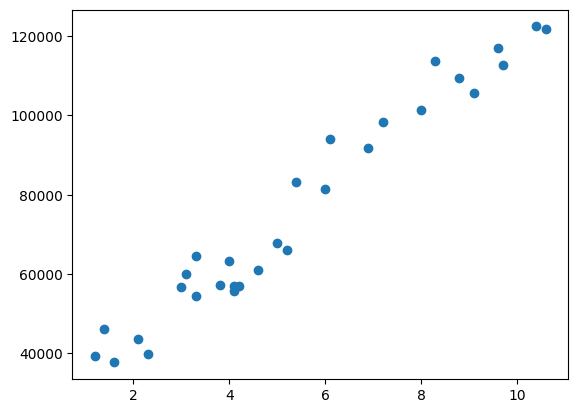

In [57]:
plt.scatter(X,y)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
X_train

23     8.3
6      3.1
3      2.1
20     6.9
5      3.0
27     9.7
12     4.1
4      2.3
10     4.0
16     5.2
28    10.4
25     9.1
17     5.4
2      1.6
7      3.3
26     9.6
24     8.8
18     6.0
11     4.1
22     8.0
29    10.6
13     4.2
15     5.0
8      3.3
Name: YearsExperience, dtype: float64

In [60]:
y_train.shape

(24,)

In [61]:
lr = LinearRegression()

In [62]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [63]:
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
X_test

array([[1.4],
       [1.2],
       [4.6],
       [3.8],
       [7.2],
       [6.1]])

In [65]:
lr.predict(X_test[0].reshape(1,1))

array([36834.63210301])

In [66]:
y_test[0]

39344.0

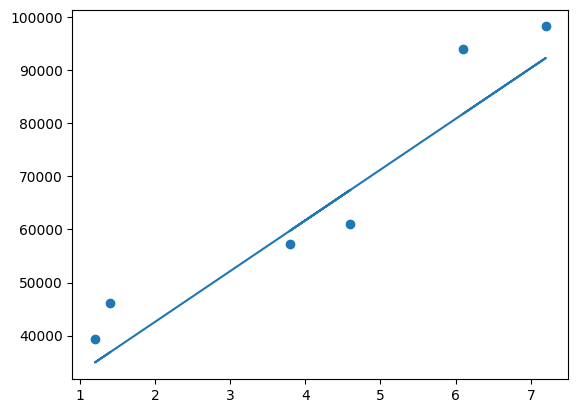

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,lr.predict(X_test))

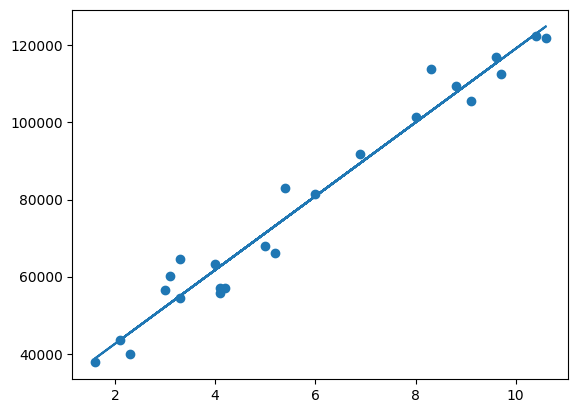

In [68]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [69]:
b = lr.coef_

In [70]:
m = lr.intercept_

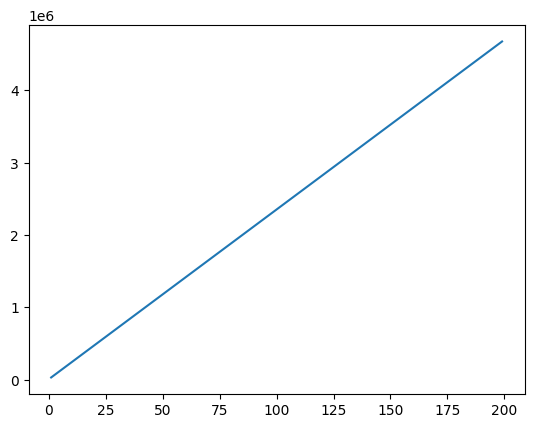

In [71]:
x = [x for x in range(1,200)]
y = [(m*x + b) for x in x ]
plt.plot(x,y)

In [72]:
from sklearn.linear_model import SGDRegressor

In [73]:
sgd = SGDRegressor()

In [74]:
sgd.fit(X_train,y_train)

SGDRegressor()

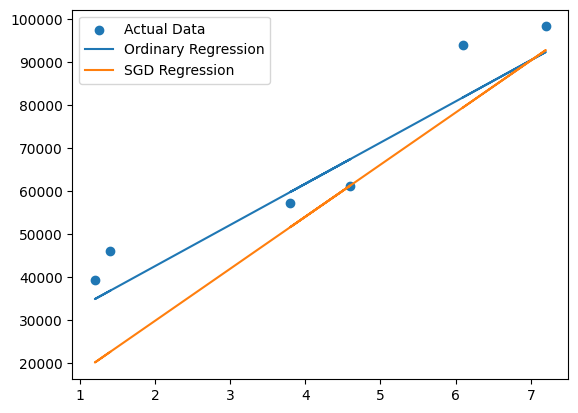

In [75]:
plt.scatter(X_test,y_test,label='Actual Data')
plt.plot(X_test,lr.predict(X_test),label='Ordinary Regression')
plt.plot(X_test,sgd.predict(X_test),label='SGD Regression')
plt.legend()
plt.show()

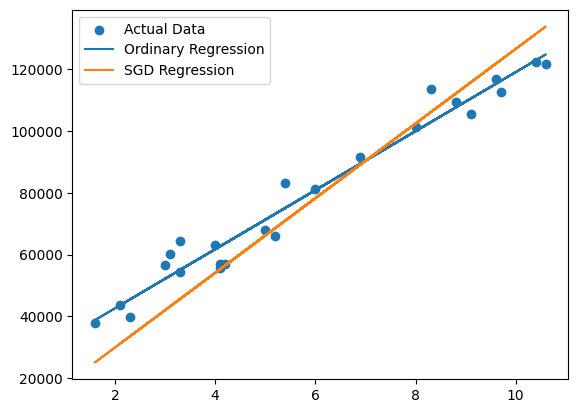

In [76]:
plt.scatter(X_train,y_train,label='Actual Data')
plt.plot(X_train,lr.predict(X_train),label='Ordinary Regression')
plt.plot(X_train,sgd.predict(X_train),label='SGD Regression')
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
y_pred = sgd.predict(X_test)

In [91]:
y_test

1     46206.0
0     39344.0
14    61112.0
9     57190.0
21    98274.0
19    93941.0
Name: Salary, dtype: float64

In [93]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 11414.639585657884
MSE 199132057.75830826
RMSE 14111.415866535444


In [95]:
#Calculate R2 score
r2 = r2_score(y_test,y_pred)
print("R2 Score: ",r2_score(y_test,y_pred))
#Adjusted R2 Score


R2 Score:  0.6051791467343428


In [77]:
#Let's create our own Simple Linear regression through formula!!
class HamroLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

In [78]:
import numpy as np
import pandas as pd

In [79]:
#Easy Sample data
X = [1,2,3,4,6]
y = [5.1, 6.9, 9.2, 10.8, 13.1]

In [80]:
lr = HamroLR()

In [81]:
X = np.array(X)
y = np.array(y)

In [82]:
lr.fit(X,y)

1.6202702702702703
3.8351351351351344


In [83]:
lr.predict(100)

100


165.86216216216218

[1 2 3 4 6]


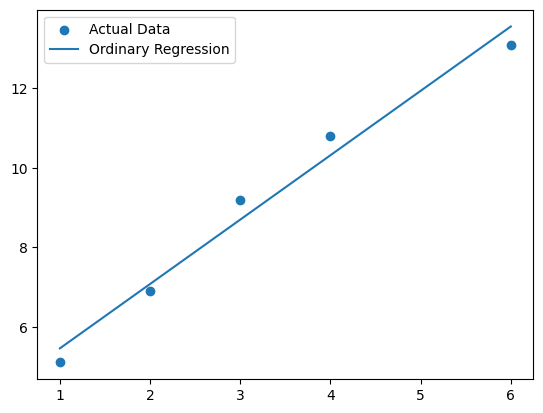

In [84]:
plt.scatter(X,y,label='Actual Data')
plt.plot(X,lr.predict(X),label='Ordinary Regression')
plt.legend()
plt.show()